In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
x_train.shape
x_test.shape
y_train.shape
y_test.shape

(10000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train.reshape(-1,)

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]], dtype=uint8)
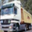

In [7]:
x_train[1]

In [8]:
clases=['aeroplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
clases[1]

'automobile'

In [9]:
y_train[1]

array([9], dtype=uint8)

In [12]:
def plot(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(clases[int(y[index])])

<ipython-input-12-197bc55d17b2>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(clases[int(y[index])])


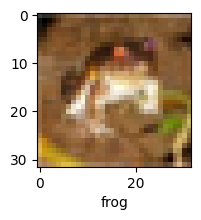

In [14]:
plot(x_train,y_train,0)

<ipython-input-12-197bc55d17b2>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(clases[int(y[index])])


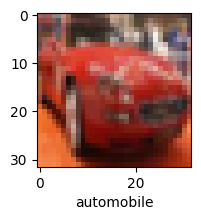

In [15]:
plot(x_train,y_train,5)

In [16]:
x_train=x_train/255
x_test=x_test/255

In [17]:
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [18]:
x_test

array([[[[0.61960784, 0.43921569, 0.19215686],
         [0.62352941, 0.43529412, 0.18431373],
         [0.64705882, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254902, 0.14117647],
         [0.49411765, 0.35686275, 0.14117647],
         [0.45490196, 0.33333333, 0.12941176]],

        [[0.59607843, 0.43921569, 0.2       ],
         [0.59215686, 0.43137255, 0.15686275],
         [0.62352941, 0.44705882, 0.17647059],
         ...,
         [0.53333333, 0.37254902, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509804, 0.13333333]],

        [[0.59215686, 0.43137255, 0.18431373],
         [0.59215686, 0.42745098, 0.12941176],
         [0.61960784, 0.43529412, 0.14117647],
         ...,
         [0.54509804, 0.38431373, 0.13333333],
         [0.50980392, 0.37254902, 0.13333333],
         [0.47058824, 0.34901961, 0.12941176]],

        ...,

        [[0.26666667, 0.48627451, 0.69411765],
         [0.16470588, 0.39215686, 0.58039216]

In [19]:
CNN=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
CNN.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [21]:
CNN.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 43ms/step - accuracy: 0.3224 - loss: 1.8190
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 42ms/step - accuracy: 0.5478 - loss: 1.2646
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 93s 49ms/step - accuracy: 0.6067 - loss: 1.1118
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 44ms/step - accuracy: 0.6480 - loss: 1.0001
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 42ms/step - accuracy: 0.6741 - loss: 0.9204
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.6957 - loss: 0.8692
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.7074 - loss: 0.8254
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 92s 49ms/step - accuracy: 0.7283 - loss: 0.7684
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 100s 64ms/step - accuracy: 0.7395 - loss: 0.7386
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 106s 41ms/step - accuracy: 0.7503 - loss: 0.7112


In [22]:
CNN.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6963 - loss: 0.8868


[0.8988974690437317, 0.6924999952316284]

In [23]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [24]:
y_test.reshape(-1,)

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [25]:
y_pred=CNN.predict(x_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step


array([[-2.1030583 , -4.46831   , -2.4067788 ,  5.1921372 , -4.668809  ,
         3.4309292 ,  2.4579415 , -3.215     , -0.41077238, -2.794556  ],
       [ 4.0083222 ,  4.340945  , -3.3261309 , -4.198817  , -6.2509503 ,
        -7.5666037 , -6.955778  , -6.4757123 ,  7.721454  ,  1.2681218 ],
       [ 0.9482722 ,  2.8613098 , -2.6950383 , -0.47339612, -2.300487  ,
        -2.492795  , -3.4915507 , -2.0345204 ,  3.15265   ,  1.887366  ],
       [ 3.5924008 , -1.792217  ,  1.157766  , -0.9571731 , -0.63142455,
        -4.6213975 , -2.920361  , -6.5418477 ,  6.0173206 , -2.2229898 ],
       [-5.8557954 , -7.3857603 ,  1.9109337 ,  3.3196099 ,  5.122484  ,
         0.12720478,  4.647623  , -4.229496  , -7.795478  , -7.1575127 ]],
      dtype=float32)

In [27]:
np.argmax(y_pred[2])

8

In [28]:
y_clas=[np.argmax(element) for element in y_pred]
y_clas[:5]

[3, 8, 8, 8, 4]

In [30]:
y_test[:5].reshape(-1,)

array([3, 8, 8, 0, 6], dtype=uint8)